<a href="https://colab.research.google.com/github/riyakansal04/sign-language-recognition-/blob/main/sign_lang_detection_project_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn
!pip install visualkeras
import visualkeras
!pip install ann-visualizer
import ann_visualizer
from ann_visualizer.visualize import ann_viz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=bf3af3fccbb6b5c46e070078ebf0fabd7c78cad6dc68241e51ea1a29fd2f32fa
  Stored in directory: /root/.cache/pip/wheels/28/4a/ad/e82da1aad2994e42bf0f4b1d403fdd8a64dfc38ae2c8a5daa4
Successfully built ann-visualizer


In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyakansal17","key":"7a217495dbbf0755d1c0750d9759d23b"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

Dataset URL: https://www.kaggle.com/datasets/prathumarikeri/indian-sign-language-isl
License(s): CC-BY-SA-4.0


In [ ]:
! mkdir dataset

In [ ]:
! unzip indian-sign-language-isl.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Indian/V/819.jpg  
  inflating: dataset/Indian/V/82.jpg  
  inflating: dataset/Indian/V/820.jpg  
  inflating: dataset/Indian/V/821.jpg  
  inflating: dataset/Indian/V/822.jpg  
  inflating: dataset/Indian/V/823.jpg  
  inflating: dataset/Indian/V/824.jpg  
  inflating: dataset/Indian/V/825.jpg  
  inflating: dataset/Indian/V/826.jpg  
  inflating: dataset/Indian/V/827.jpg  
  inflating: dataset/Indian/V/828.jpg  
  inflating: dataset/Indian/V/829.jpg  
  inflating: dataset/Indian/V/83.jpg  
  inflating: dataset/Indian/V/830.jpg  
  inflating: dataset/Indian/V/831.jpg  
  inflating: dataset/Indian/V/832.jpg  
  inflating: dataset/Indian/V/833.jpg  
  inflating: dataset/Indian/V/834.jpg  
  inflating: dataset/Indian/V/835.jpg  
  inflating: dataset/Indian/V/836.jpg  
  inflating: dataset/Indian/V/837.jpg  
  inflating: dataset/Indian/V/838.jpg  
  inflating: dataset/Indian/V/839.jpg  
  inflating: dataset/Indian/V/8

In [ ]:
data_folder = '/content/dataset/Indian'

In [ ]:
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(data_folder))

    for folder in folders:
        index += 1

        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(data_folder + '/' + folder):
            img = cv2.imread(data_folder + '/' + folder + '/' + image, 0)


            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

    return x_train, x_test, y_train, y_test

def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [ ]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=17)
x_test, y_test = shuffle(x_test, y_test, random_state=17)

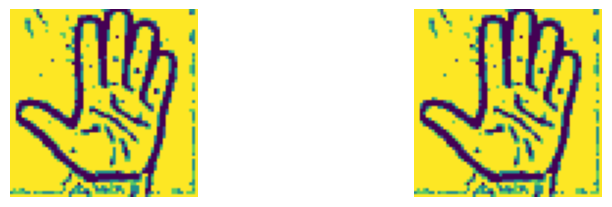

In [ ]:
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

In [ ]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,675 (2.23 MB)

 Trainable params: 584,675 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


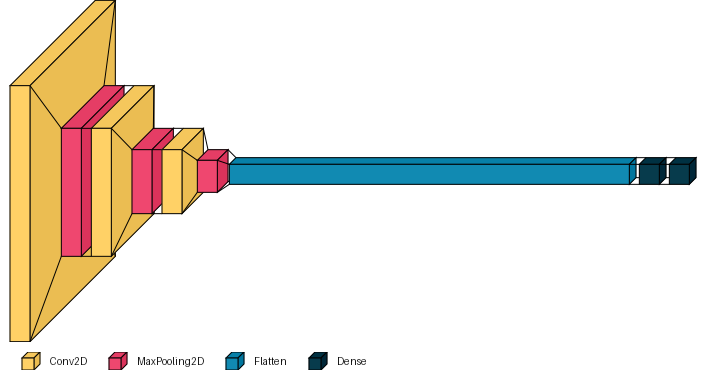

In [ ]:
visualkeras.layered_view(model,legend=True)

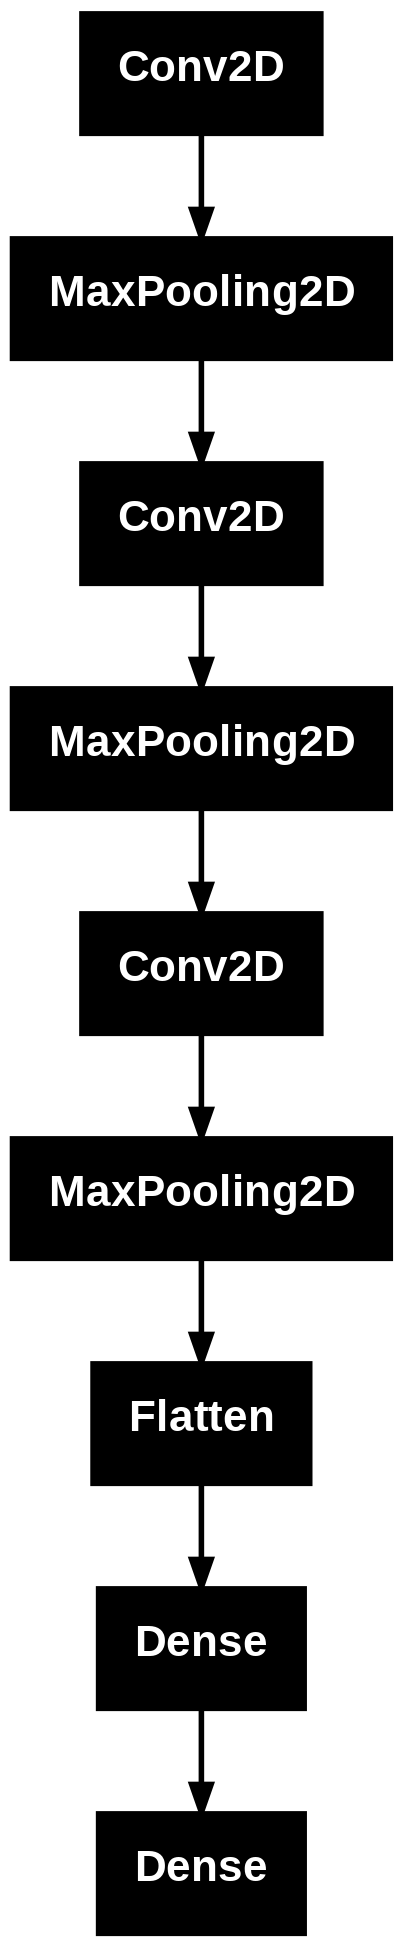

In [ ]:
keras.utils.plot_model(model)

In [ ]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [ ]:
classes = 35
epochs = 50


adam = Adam(learning_rate=0.00001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/50
1069/1069 - 19s - 18ms/step - accuracy: 0.4685 - loss: 2.7725 - val_accuracy: 0.9688 - val_loss: 0.7717
Epoch 2/50
1069/1069 - 6s - 6ms/step - accuracy: 0.9831 - loss: 0.2389 - val_accuracy: 0.9912 - val_loss: 0.0756
Epoch 3/50
1069/1069 - 10s - 10ms/step - accuracy: 0.9948 - loss: 0.0438 - val_accuracy: 0.9967 - val_loss: 0.0229
Epoch 4/50
1069/1069 - 6s - 5ms/step - accuracy: 0.9980 - loss: 0.0164 - val_accuracy: 0.9989 - val_loss: 0.0090
Epoch 5/50
1069/1069 - 6s - 6ms/step - accuracy: 0.9989 - loss: 0.0079 - val_accuracy: 0.9998 - val_loss: 0.0043
Epoch 6/50
1069/1069 - 6s - 5ms/step - accuracy: 0.9996 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/50
1069/1069 - 6s - 5ms/step - accuracy: 0.9997 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/50
1069/1069 - 10s - 9ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 9/50
1069/1069 - 10s - 10ms/step - accuracy: 0.9999 - loss: 0.0010 - val_accuracy: 1.

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
class_labels = list(map_characters.values())

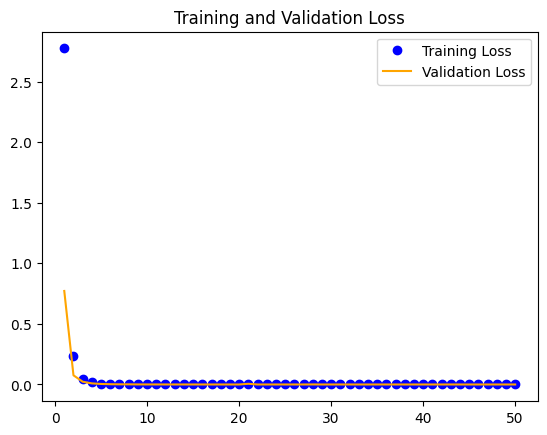

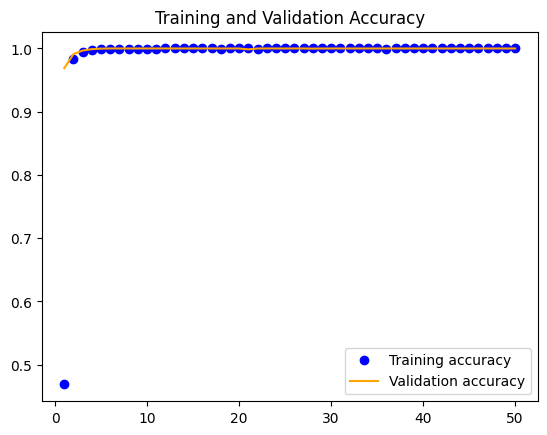

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='')
Y_pred_classes = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

[1.1417034784244606e-06, 1.0]

Keras CNN - accuracy: 1.0 

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       230
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       227
           5       1.00      1.00      1.00       240
           6       1.00      1.00      1.00       260
           7       1.00      1.00      1.00       235
           8       1.00      1.00      1.00       242
           9       1.00      1.00      1.00       231
           A       1.00      1.00      1.00       251
           B       1.00      1.00      1.00       229
           C       1.00      1.00      1.00       285
           D       1.00      1.00      1.00       261
           E       1.00      1.00      1.00       242
           F       1.00      1.00      1.00       245
           G       1.00      1.00  

In [ ]:
model.save('ISL_Predictor.h5')

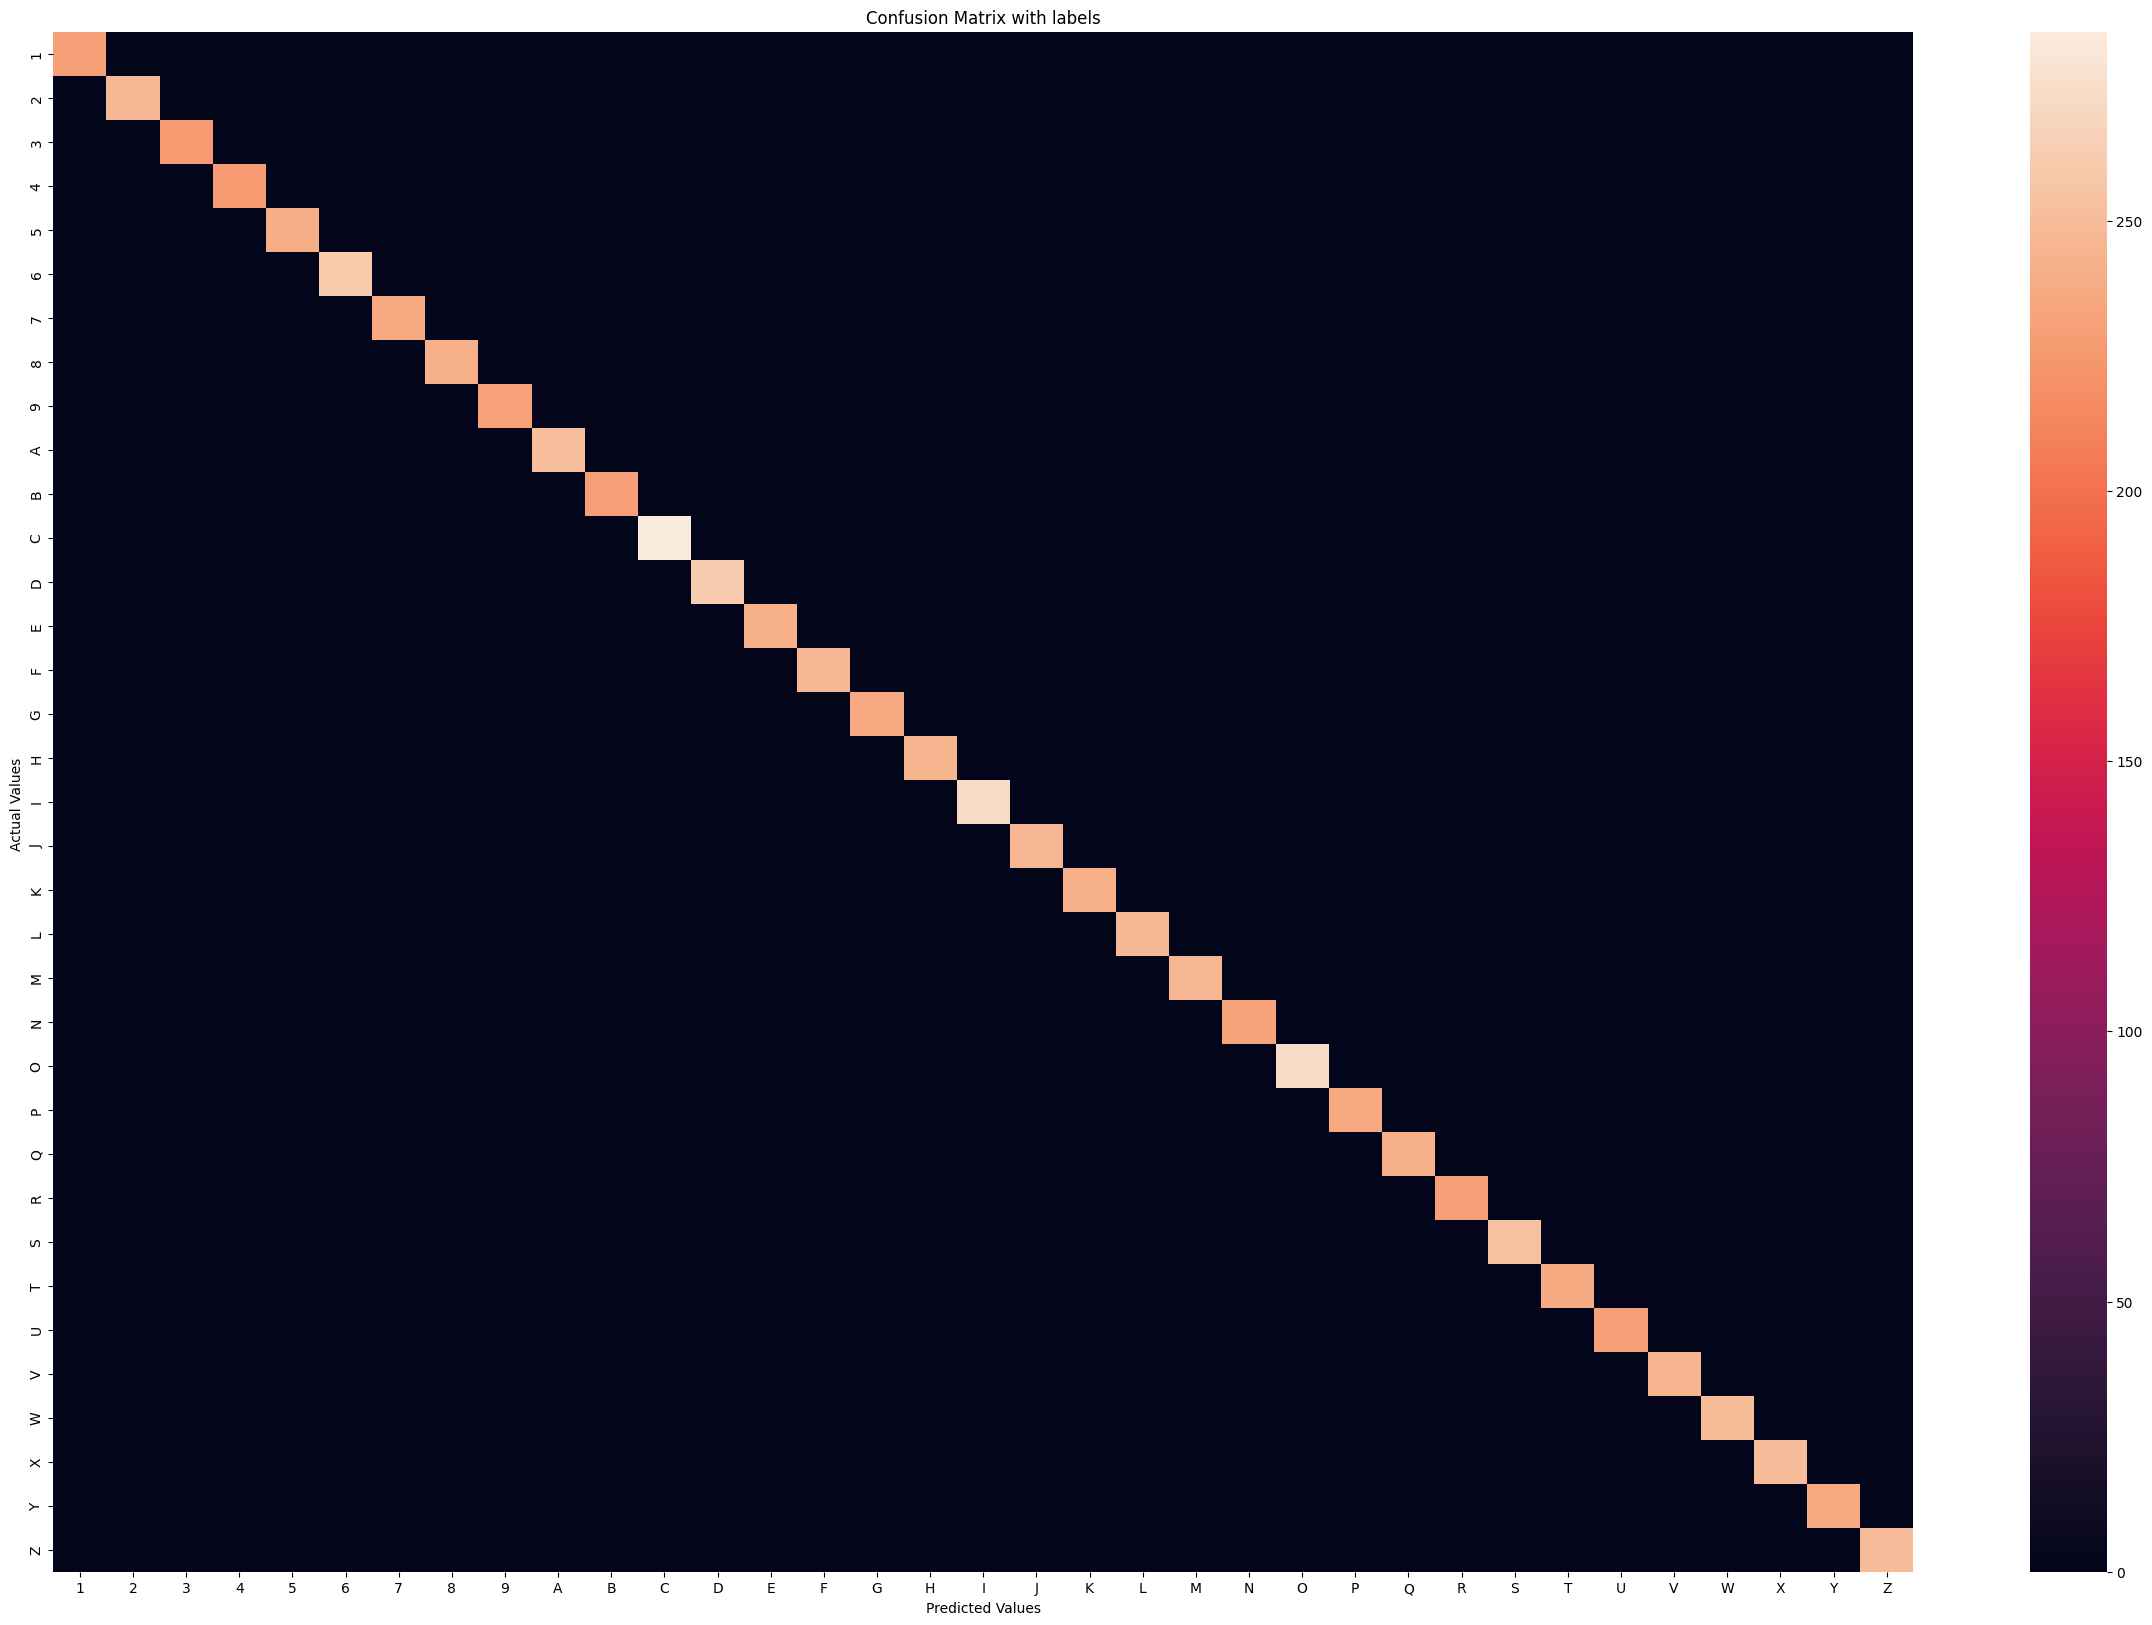

In [ ]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[230   0   0 ...   0   0   0]
 [  0 248   0 ...   0   0   0]
 [  0   0 227 ...   0   0   0]
 ...
 [  0   0   0 ... 250   0   0]
 [  0   0   0 ...   0 237   0]
 [  0   0   0 ...   0   0 250]]


In [ ]:
model=tf.keras.models.load_model('ISL_Predictor.h5')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,677 (2.23 MB)

 Trainable params: 584,675 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)